#### Fazendo a conexão do banco de Dados PostgresSQL  ####

In [135]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt



con = psycopg2.connect(host='localhost', database='ebdb',
user='postgres', password='366936')
cur = con.cursor()

#### Através de uma consulta sql conseguimos contruir um dataframe (Pandas) ####

In [136]:
df_orders = pd.read_sql_query('select * from dataset.orders',con)
df_orders.head()
    

,orderId,status,statusDescription,creationDate,authorizedDate,totalValue,paymentNames
0,921060908773-01,canceled,Cancelado,2019-03-29 21:15:08+00:00,NaT,212689,Boleto Bancário
1,1035170627063-01,invoiced,Faturado,2020-05-26 16:10:31+00:00,2020-05-26 16:10:43+00:00,59409,PayPalPlus
2,1035171496388-01,invoiced,Faturado,2020-05-26 16:24:55+00:00,2020-05-26 17:00:19+00:00,43544,Débito Itau
3,1035182874044-01,invoiced,Faturado,2020-05-26 16:47:52+00:00,2020-05-27 13:00:34+00:00,35863,Boleto Bancário
4,1035183140510-01,canceled,Cancelado,2020-05-26 16:52:22+00:00,NaT,14715,Boleto Bancário


In [137]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10644 entries, 0 to 10643
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   orderId            10644 non-null  object             
 1   status             10644 non-null  object             
 2   statusDescription  10644 non-null  object             
 3   creationDate       10644 non-null  datetime64[ns, UTC]
 4   authorizedDate     8404 non-null   datetime64[ns, UTC]
 5   totalValue         10644 non-null  int64              
 6   paymentNames       10404 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(1), object(4)
memory usage: 582.2+ KB


#### Total de ordens do e-comerce

In [138]:
df_orders['orderId'].nunique()

5322

In [139]:
df_orders.isnull().sum()

orderId                 0
status                  0
statusDescription       0
creationDate            0
authorizedDate       2240
totalValue              0
paymentNames          240
dtype: int64

In [140]:
# existem registros duplicados que precisam ser tratados
print(any(df_orders['orderId'].duplicated()))
df_orders = df_orders.drop_duplicates()



True


In [141]:
# tratando valores nulos 
df_orders.dropna()

,orderId,status,statusDescription,creationDate,authorizedDate,totalValue,paymentNames
1,1035170627063-01,invoiced,Faturado,2020-05-26 16:10:31+00:00,2020-05-26 16:10:43+00:00,59409,PayPalPlus
2,1035171496388-01,invoiced,Faturado,2020-05-26 16:24:55+00:00,2020-05-26 17:00:19+00:00,43544,Débito Itau
3,1035182874044-01,invoiced,Faturado,2020-05-26 16:47:52+00:00,2020-05-27 13:00:34+00:00,35863,Boleto Bancário
5,1035180591936-01,invoiced,Faturado,2020-05-26 17:09:47+00:00,2020-05-27 13:36:54+00:00,4083,Boleto Bancário
7,933473280816-01,invoiced,Faturado,2019-05-20 13:54:42+00:00,2019-05-21 17:00:30+00:00,31514,Boleto Bancário
...,...,...,...,...,...,...,...
5311,1056922257810-01,invoiced,Faturado,2020-08-25 06:37:35+00:00,2020-08-26 13:45:04+00:00,61290,Boleto Bancário
5313,1057111413173-01,invoiced,Faturado,2020-08-26 02:23:30+00:00,2020-08-26 02:23:41+00:00,27338,PayPalPlus
5315,1057120724104-01,invoiced,Faturado,2020-08-26 03:12:03+00:00,2020-08-26 12:59:30+00:00,44139,Boleto Bancário
5318,1057342679330-01,handling,Preparando Entrega,2020-08-27 00:44:35+00:00,2020-08-27 00:44:46+00:00,1956,PayPalPlus


In [142]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5322 entries, 0 to 5321
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   orderId            5322 non-null   object             
 1   status             5322 non-null   object             
 2   statusDescription  5322 non-null   object             
 3   creationDate       5322 non-null   datetime64[ns, UTC]
 4   authorizedDate     4202 non-null   datetime64[ns, UTC]
 5   totalValue         5322 non-null   int64              
 6   paymentNames       5202 non-null   object             
dtypes: datetime64[ns, UTC](2), int64(1), object(4)
memory usage: 332.6+ KB


#### Soma dos valores de todos os pedidos pagos.

In [143]:
df_orders['totalValue'].sum()

192542758

#### Modelos de pagamentos mais utilizados

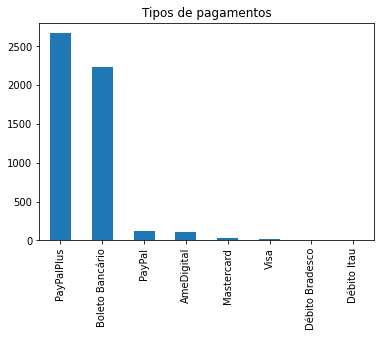

In [144]:
df_orders['paymentNames'].value_counts().plot(kind='bar', title='Tipos de pagamentos')

*É possível observar que a maior parte dos pagamentos são feitos através do paypalplus e boleto bancário, logo a manutenção desses serviços é mais importante que as demais.*

#### Total De pedidos Pagos 

In [145]:
(df_orders['status']=='invoiced').sum()


4162

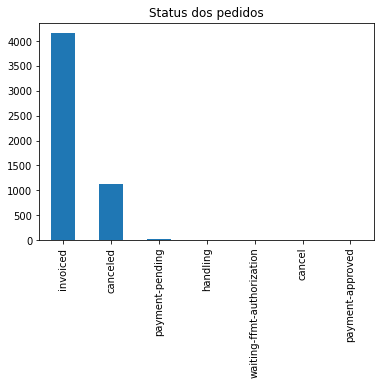

In [146]:
df_orders['status'].value_counts().plot(kind='bar', title='Status dos pedidos')

*A maioria dos pedidos são concluídos, logo o modelo de site e estratégias de marketing estão alinhados com as prioridades dos clientes.*

#### Quantidade de Clientes 

In [147]:
df_clientes = pd.read_sql_query('select * from dataset.order_clients;',con)
df_clientes.head()

,orderId,firstName,userProfileId
0,921060908773-01,teste,d2a40eac-4be0-45cf-a8c2-ce77c1ce6e35
1,1035760481271-01,Tanyclaer,1082b882-2476-4198-9ab2-b75969d70fcf
2,933472736971-01,ju,cc4aacc0-6af1-4236-9771-1b0df28b84c5
3,1035170627063-01,Maria Fernanda,8d4ee5c7-bcbf-468c-8641-f13a58d4cab6
4,1035171496388-01,CLAUDIA,e8f368d0-e504-4d03-b478-070ea0980936


In [148]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10644 entries, 0 to 10643
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   orderId        10644 non-null  object
 1   firstName      10644 non-null  object
 2   userProfileId  10420 non-null  object
dtypes: object(3)
memory usage: 249.6+ KB


In [149]:
df_clientes.isnull().sum()

orderId            0
firstName          0
userProfileId    224
dtype: int64

In [150]:
# Tratando dados nulos
df_clientes.dropna()


,orderId,firstName,userProfileId
0,921060908773-01,teste,d2a40eac-4be0-45cf-a8c2-ce77c1ce6e35
1,1035760481271-01,Tanyclaer,1082b882-2476-4198-9ab2-b75969d70fcf
2,933472736971-01,ju,cc4aacc0-6af1-4236-9771-1b0df28b84c5
3,1035170627063-01,Maria Fernanda,8d4ee5c7-bcbf-468c-8641-f13a58d4cab6
4,1035171496388-01,CLAUDIA,e8f368d0-e504-4d03-b478-070ea0980936
...,...,...,...
10639,1057112887242-01,Helen,4b6ff588-a225-437f-b6f0-6d15a5a5a307
10640,1057111413173-01,Luciane,de0fea29-1125-4fc4-955a-24902e919252
10641,1057123169732-01,Fernando,7e500927-d2d9-4a72-aae2-fda61c32594c
10642,1057120724104-01,Carolina,8a7e28f2-3a4c-4b1b-80a4-cd5061c49ba0


In [151]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10644 entries, 0 to 10643
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   orderId        10644 non-null  object
 1   firstName      10644 non-null  object
 2   userProfileId  10420 non-null  object
dtypes: object(3)
memory usage: 249.6+ KB


#### Total De  Clientes 

In [152]:
df_clientes['userProfileId'].nunique()

3445

#### Vendas por categorias de produtos

In [153]:
df_categorias = pd.read_sql_query('select a."orderId", a.status, p."CategoryId" from dataset.orders a join dataset.order_items g on a."orderId" = g."orderId" join dataset.products p on  p."product_Id" = g."productId" ',con) 
df_categorias.head()

,orderId,status,CategoryId
0,1028680800913-01,invoiced,322951761
1,1028680800913-01,invoiced,322951761
2,1026853121043-01,invoiced,322951761
3,1026853121043-01,invoiced,322951761
4,1021782077463-01,invoiced,322951761


In [154]:
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100536 entries, 0 to 100535
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   orderId     100536 non-null  object
 1   status      100536 non-null  object
 2   CategoryId  100536 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [155]:
df_categorias['orderId'].nunique()

5198

In [156]:
df_categorias = df_categorias.drop_duplicates()



In [157]:
df_categorias.isnull().sum()

orderId       0
status        0
CategoryId    0
dtype: int64

In [158]:
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8017 entries, 0 to 50136
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   orderId     8017 non-null   object
 1   status      8017 non-null   object
 2   CategoryId  8017 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 250.5+ KB


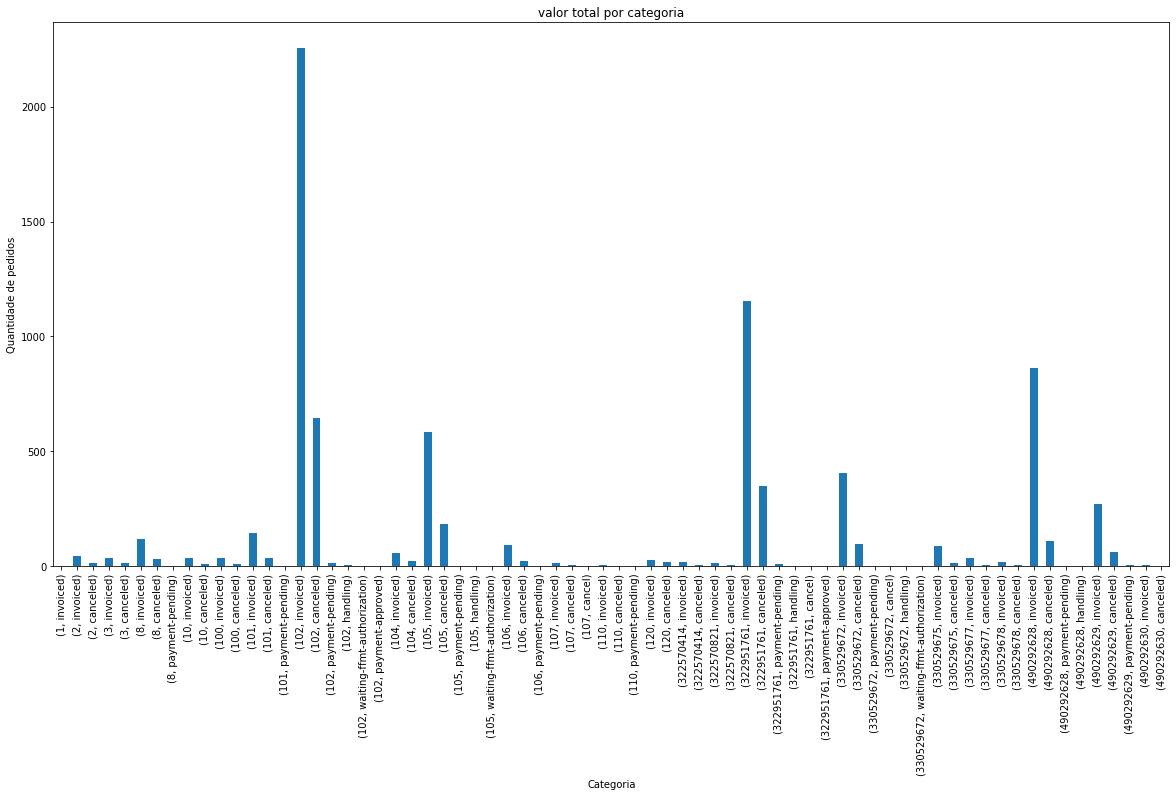

In [159]:
# Conta quantos produtos por categoria e coloca dentro da variável vendas_produto_por_categoria:
vendas_produto_por_categoria = df_categorias.groupby(by='CategoryId').status.value_counts()
vendas_produto_por_categoria.plot(kind='bar',title='valor total por categoria',ylabel='Quantidade de pedidos',xlabel='Categoria',figsize=(20,10))

*As categorias cujo id são 102, 322951761 e 490292628 se destacaram com muitas vendas faturadas, são as categorias que vendem mais no e-comerce*

#### Quantidade de vendas por e estado

In [160]:
df_estado = pd.read_sql_query('select a."totalValue", a.status, g.state from dataset.orders a join dataset.order_shippingaddress g on a."orderId" = g."orderId"',con)
df_estado.head()

,totalValue,status,state
0,212689,canceled,SP
1,212689,canceled,SP
2,59409,invoiced,SP
3,59409,invoiced,SP
4,43544,invoiced,PA


In [161]:
df_estado = df_estado.drop_duplicates()
df_estado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 10626
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   totalValue  4293 non-null   int64 
 1   status      4293 non-null   object
 2   state       4293 non-null   object
dtypes: int64(1), object(2)
memory usage: 134.2+ KB


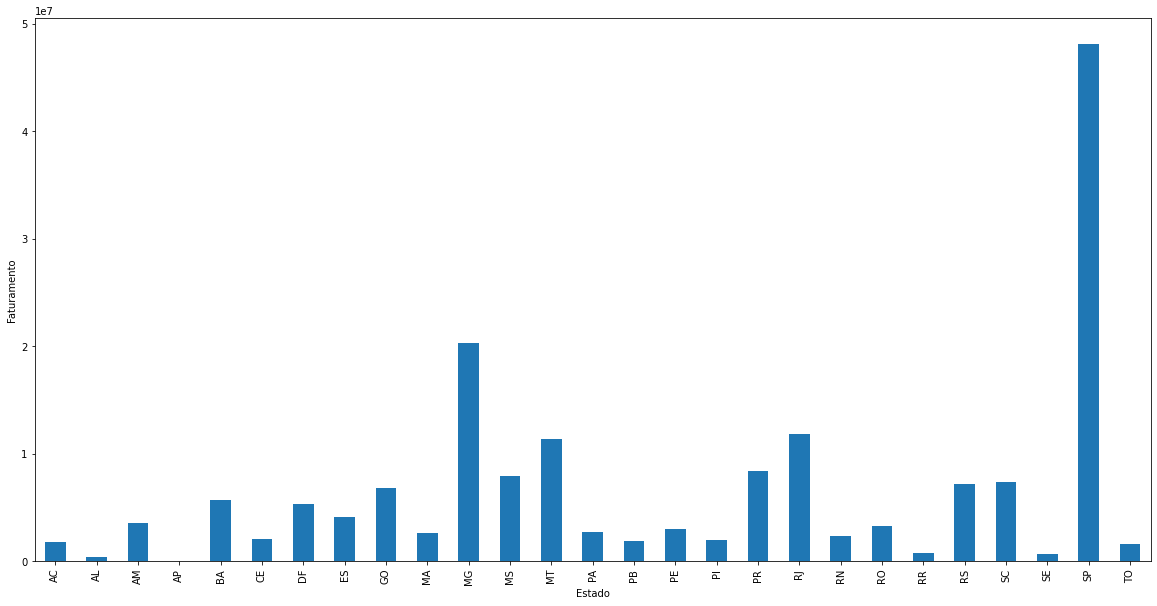

In [162]:
vendas_produto_estado = df_estado.groupby(by='state').totalValue.sum()
vendas_produto_estado.plot(kind ='bar' ,figsize=(20,10),xlabel='Estado',ylabel='Faturamento')



   *No estado de São Paulo ocorreu o maior faturamento, com um indicador consideravelmente maior que os outros, Minas Gerais e Rio de Janeiro também se destacaram com um bom desempenho.*

   *É evidente que o estado de São Paulo oferece um retorno muito maior do que os demais estados, logo é interessante direcionar marketing e recursos para essa região.*

#### Quais meses do ano houve maior Faturamento?

In [163]:
# transformando dados da tabela creationdate para datetime
df_orders['creationDate'] = pd.to_datetime(df_orders['creationDate'])

In [164]:
# Criando uma nova coluna para os meses 
# e usando o método to_periodo() com o ´M´ para formatar os dados:
df_orders['order_mes'] = df_orders.creationDate.dt.to_period('M').astype(str)
df_orders.head()

C:\Users\breno\Anaconda3\envs\Dev\lib\site-packages\pandas\core\arrays\datetimes.py:1091: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,orderId,status,statusDescription,creationDate,authorizedDate,totalValue,paymentNames,order_mes
0,921060908773-01,canceled,Cancelado,2019-03-29 21:15:08+00:00,NaT,212689,Boleto Bancário,2019-03
1,1035170627063-01,invoiced,Faturado,2020-05-26 16:10:31+00:00,2020-05-26 16:10:43+00:00,59409,PayPalPlus,2020-05
2,1035171496388-01,invoiced,Faturado,2020-05-26 16:24:55+00:00,2020-05-26 17:00:19+00:00,43544,Débito Itau,2020-05
3,1035182874044-01,invoiced,Faturado,2020-05-26 16:47:52+00:00,2020-05-27 13:00:34+00:00,35863,Boleto Bancário,2020-05
4,1035183140510-01,canceled,Cancelado,2020-05-26 16:52:22+00:00,NaT,14715,Boleto Bancário,2020-05


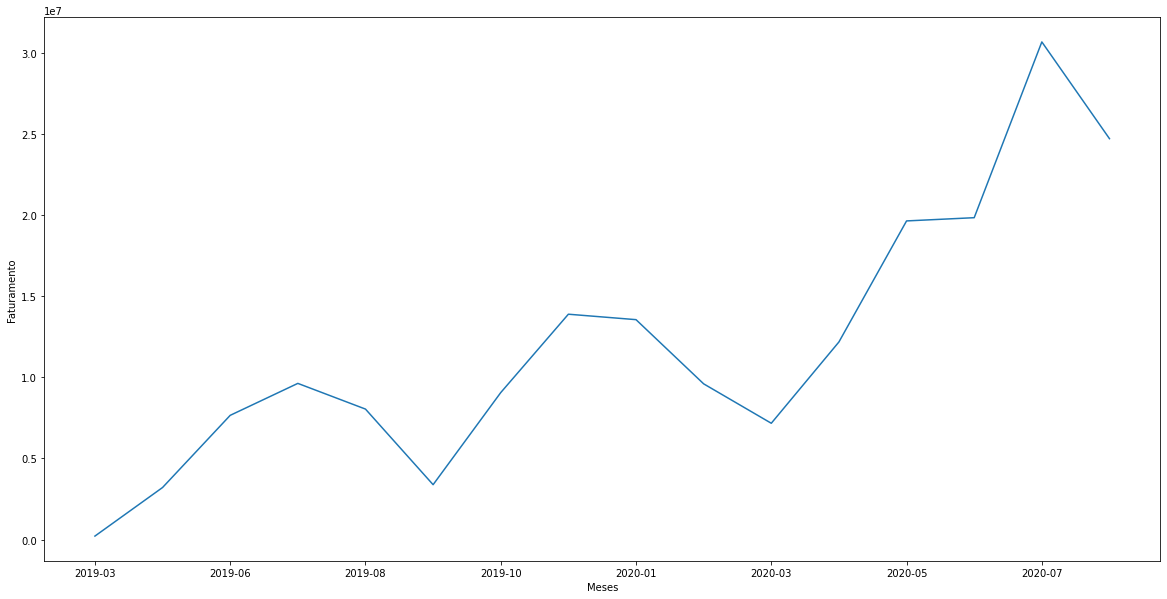

In [165]:
vendas_por_mes = df_orders.groupby(by='order_mes').totalValue.sum()
vendas_por_mes.plot(xlabel='Meses',ylabel='Faturamento',figsize=(20,10))

   *É possivel observar que existe uma tendência nas vendas ao longo dos meses: Do começo do ano até julho as vendas crescem, de julho até setembro as vendas sofrem uma queda e de setembro até novembro as vendas voltam a crescer e se mantêm com mesmo indicador até  o começo do ano seguinte.* 
   *Logo é interessante manter mais produtos em estoque e investir em campanhas de marketing nas épocas onde os indicadores tendem a crescer.*

#### Previsão de Vendas com Análise de Séries Temporais usando o ARIMA 

In [166]:
series = df_orders.loc[df_orders['status']=='invoiced']
cols = ['statusDescription','creationDate','authorizedDate','totalValue','paymentNames']
series.drop(cols,axis=1,inplace=True)

C:\Users\breno\Anaconda3\envs\Dev\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [167]:
series.head()

,orderId,status,order_mes
1,1035170627063-01,invoiced,2020-05
2,1035171496388-01,invoiced,2020-05
3,1035182874044-01,invoiced,2020-05
5,1035180591936-01,invoiced,2020-05
7,933473280816-01,invoiced,2019-05


In [168]:
series.sort_values('order_mes')
series.isnull().sum()

orderId      0
status       0
order_mes    0
dtype: int64

In [169]:
series = series.groupby('order_mes')['status'].value_counts()

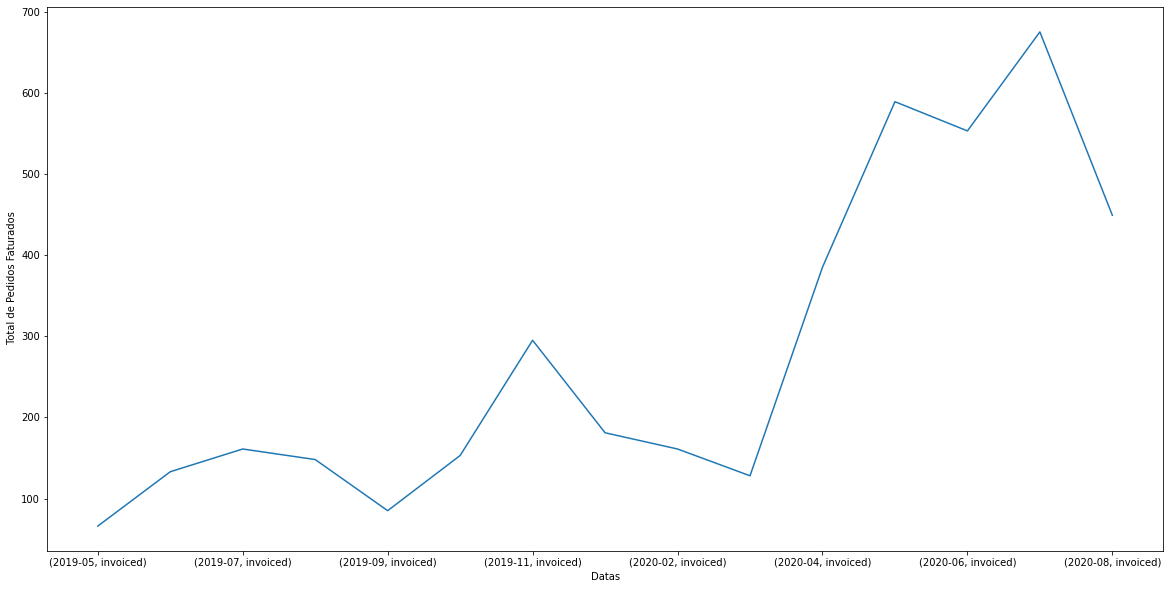

In [174]:
series.plot(figsize=(20,10),xlabel='Datas',ylabel=' Total de Pedidos Faturados')



*Alguns padrões distinguíveis aparecem quando plotamos os dados. A série temporal apresenta padrão de sazonalidade, como as vendas são sempre baixas no início do ano e altas no final do ano. Há sempre uma tendência ascendente em qualquer ano com alguns meses de baixa em meados do ano.*

#### Seleção de parâmetros para o Modelo

In [180]:
import itertools
p = d = q =range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12)for x in list(itertools.product(p,d,q))]
print ('Exemplos de parâmetros para o Arima...')
print('Arimax: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('Arimax: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('Arimax: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('Arimax: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Exemplos de parâmetros para o Arima...
Arimax: (0, 0, 1) x (0, 0, 1, 12)
Arimax: (0, 0, 1) x (0, 1, 0, 12)
Arimax: (0, 1, 0) x (0, 1, 1, 12)
Arimax: (0, 1, 0) x (1, 0, 0, 12)


In [185]:
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationary=False,
                                           enforce_envertibility= False)
            results = mod.fit()
            print('Arima{}x{} - AIC{}'.format(param,param_seasonal,results.aic))
        except:
            continue 
            

Arima(0, 0, 0)x(0, 0, 0, 12) - AIC219.32169162716207
Arima(0, 0, 0)x(0, 0, 1, 12) - AIC221.07559278308824
Arima(0, 0, 0)x(0, 1, 0, 12) - AIC47.20045299674629
Arima(0, 0, 0)x(0, 1, 1, 12) - AIC49.07251349832782
Arima(0, 0, 0)x(1, 0, 0, 12) - AIC220.76618791547173
Arima(0, 0, 0)x(1, 0, 1, 12) - AIC222.7661879158384
Arima(0, 0, 0)x(1, 1, 0, 12) - AIC48.92098513343436
Arima(0, 0, 0)x(1, 1, 1, 12) - AIC50.91098546432359
Arima(0, 0, 1)x(0, 0, 0, 12) - AIC205.80804808472647
Arima(0, 0, 1)x(0, 0, 1, 12) - AIC206.95232795364106
Arima(0, 0, 1)x(0, 1, 0, 12) - AIC46.79105284554503
Arima(0, 0, 1)x(0, 1, 1, 12) - AIC48.70229029807587
Arima(0, 0, 1)x(1, 0, 0, 12) - AIC206.9523350563605
Arima(0, 0, 1)x(1, 0, 1, 12) - AIC208.9523214606579
Arima(0, 0, 1)x(1, 1, 0, 12) - AIC48.69575235986964
Arima(0, 0, 1)x(1, 1, 1, 12) - AIC50.69090318309512
Arima(0, 1, 0)x(0, 0, 0, 12) - AIC177.2303861632288
Arima(0, 1, 0)x(0, 0, 1, 12) - AIC179.2251350251065
Arima(0, 1, 0)x(0, 1, 0, 12) - AIC28.53045864868448
Arima(0

*A saída acima mostra que os parâmetros que geram menor valor de AIC são: Arima(0, 1, 0)x(0, 1, 0, 12) - AIC28.53045864868448, por isso devemos considerar essa a melhor opção.*

In [199]:
# Ajustando o modelo Arima 
mod = sm.tsa.statespace.SARIMAX(series,
                               order=(0,1,0),
                               seasonal_order=(0,1,0,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results =mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.326e+04   6.39e+06      0.010      0.992   -1.25e+07    1.26e+07


#### Validando Previsões
*Para nos ajudar a entender a exatidão de nossas previsões, comparamos as vendas previstas às vendas reais da série temporal e definimos as previsões para começar em 2019–05 até o final dos dados.*

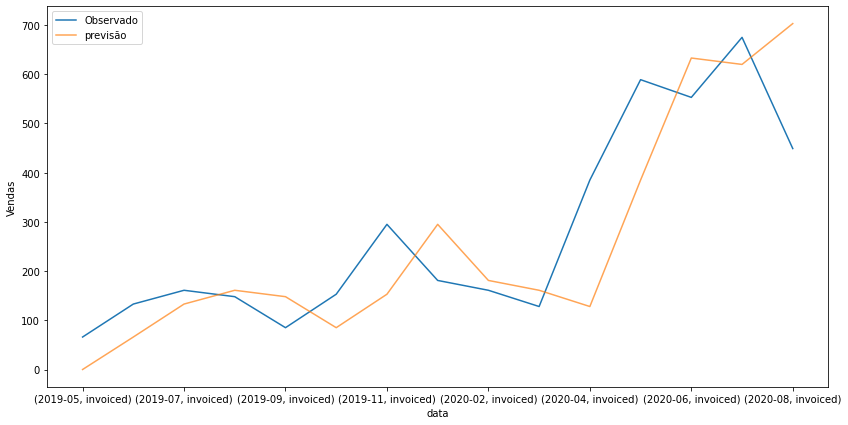

In [213]:

pred = results.get_prediction(start='2019-05',dynamic=False)
pred_ci = pred.conf_int()
ax = series['2019':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax,label='previsão',alpha=0.7,figsize=(14,7))

ax.set_xlabel('data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

*O gráfico de linhas mostra os valores observados em comparação com as previsões de previsão de rotação. No geral, nossas projeções se alinham muito bem com os valores reais, mostrando uma tendência ascendente desde o início do ano e capturou a sazonalidade no final do ano.*

#### Produzindo e Visualizando as previsões para o futuro

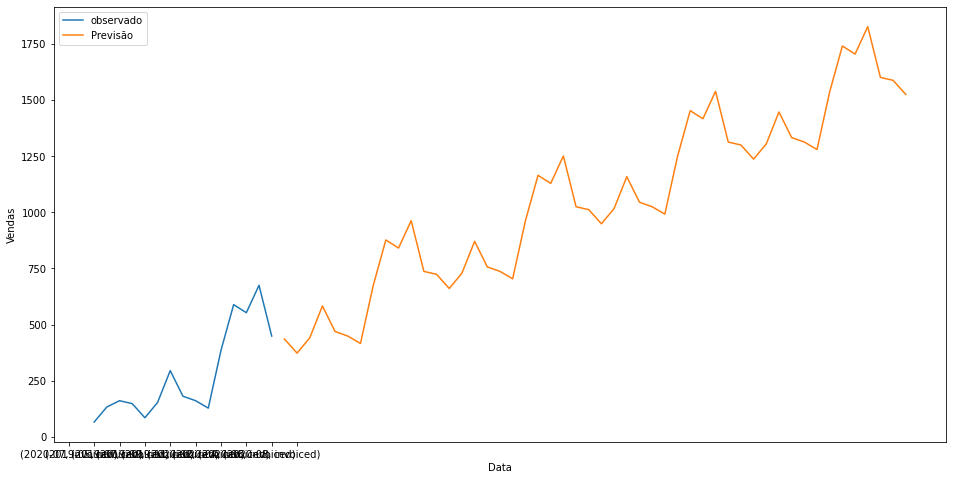

In [220]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax= series.plot(label='observado',figsize=(16,8))
pred_uc.predicted_mean.plot(ax=ax,label='Previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plt.legend()
plt.show()

*Nosso modelo captou claramente a sazonalidade das vendas conforme projetamos mais longe no futuro*